In [1]:
import os
import requests
import tarfile
from pathlib import Path

# URLs and paths
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = Path("./datasets/housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    """Download and extract the housing dataset using requests."""
    housing_path.mkdir(parents=True, exist_ok=True)
    
    tgz_path = housing_path / "housing.tgz"
    
    # Download if not already there
    if not tgz_path.exists():
        print("Downloading dataset...")
        response = requests.get(housing_url, stream=True)
        response.raise_for_status()
        with open(tgz_path, "wb") as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print("Download complete.")
    else:
        print("Dataset archive already exists, skipping download.")
    
    # Extract
    with tarfile.open(tgz_path) as housing_tgz:
        housing_tgz.extractall(path=housing_path)
        print("Extraction complete.")

# Run
fetch_housing_data()


Dataset archive already exists, skipping download.
Extraction complete.


/var/folders/t_/s0js4s493rl11zglcfk9vqjc0000gn/T/ipykernel_8226/2151500502.py:31: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


In [2]:
import os
import requests
import tarfile
from pathlib import Path

# URLs and paths
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = Path("datasets/housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    """Download and extract the housing dataset using requests, with safe tar extraction."""
    housing_path.mkdir(parents=True, exist_ok=True)
    
    tgz_path = housing_path / "housing.tgz"
    
    # Download if not already there
    if not tgz_path.exists():
        print("Downloading dataset...")
        response = requests.get(housing_url, stream=True)
        response.raise_for_status()
        with open(tgz_path, "wb") as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print("Download complete.")
    else:
        print("Dataset archive already exists, skipping download.")
    
    # Extract safely (future-proof for Python 3.14+)
    with tarfile.open(tgz_path) as housing_tgz:
        housing_tgz.extractall(path=housing_path, filter="data")
        print("Extraction complete.")

# Run
fetch_housing_data()


Dataset archive already exists, skipping download.
Extraction complete.


In [3]:
import pandas as pd
from pathlib import Path

def load_housing_data(housing_path=HOUSING_PATH):
    """Load the housing dataset into a Pandas DataFrame."""
    csv_path = Path(housing_path) / "housing.csv"
    
    if not csv_path.exists():
        raise FileNotFoundError(f"Dataset not found at {csv_path}. "
                                f"Did you run fetch_housing_data() first?")
    
    return pd.read_csv(csv_path)

# Example usage
housing_df = load_housing_data()
housing_df.head()




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


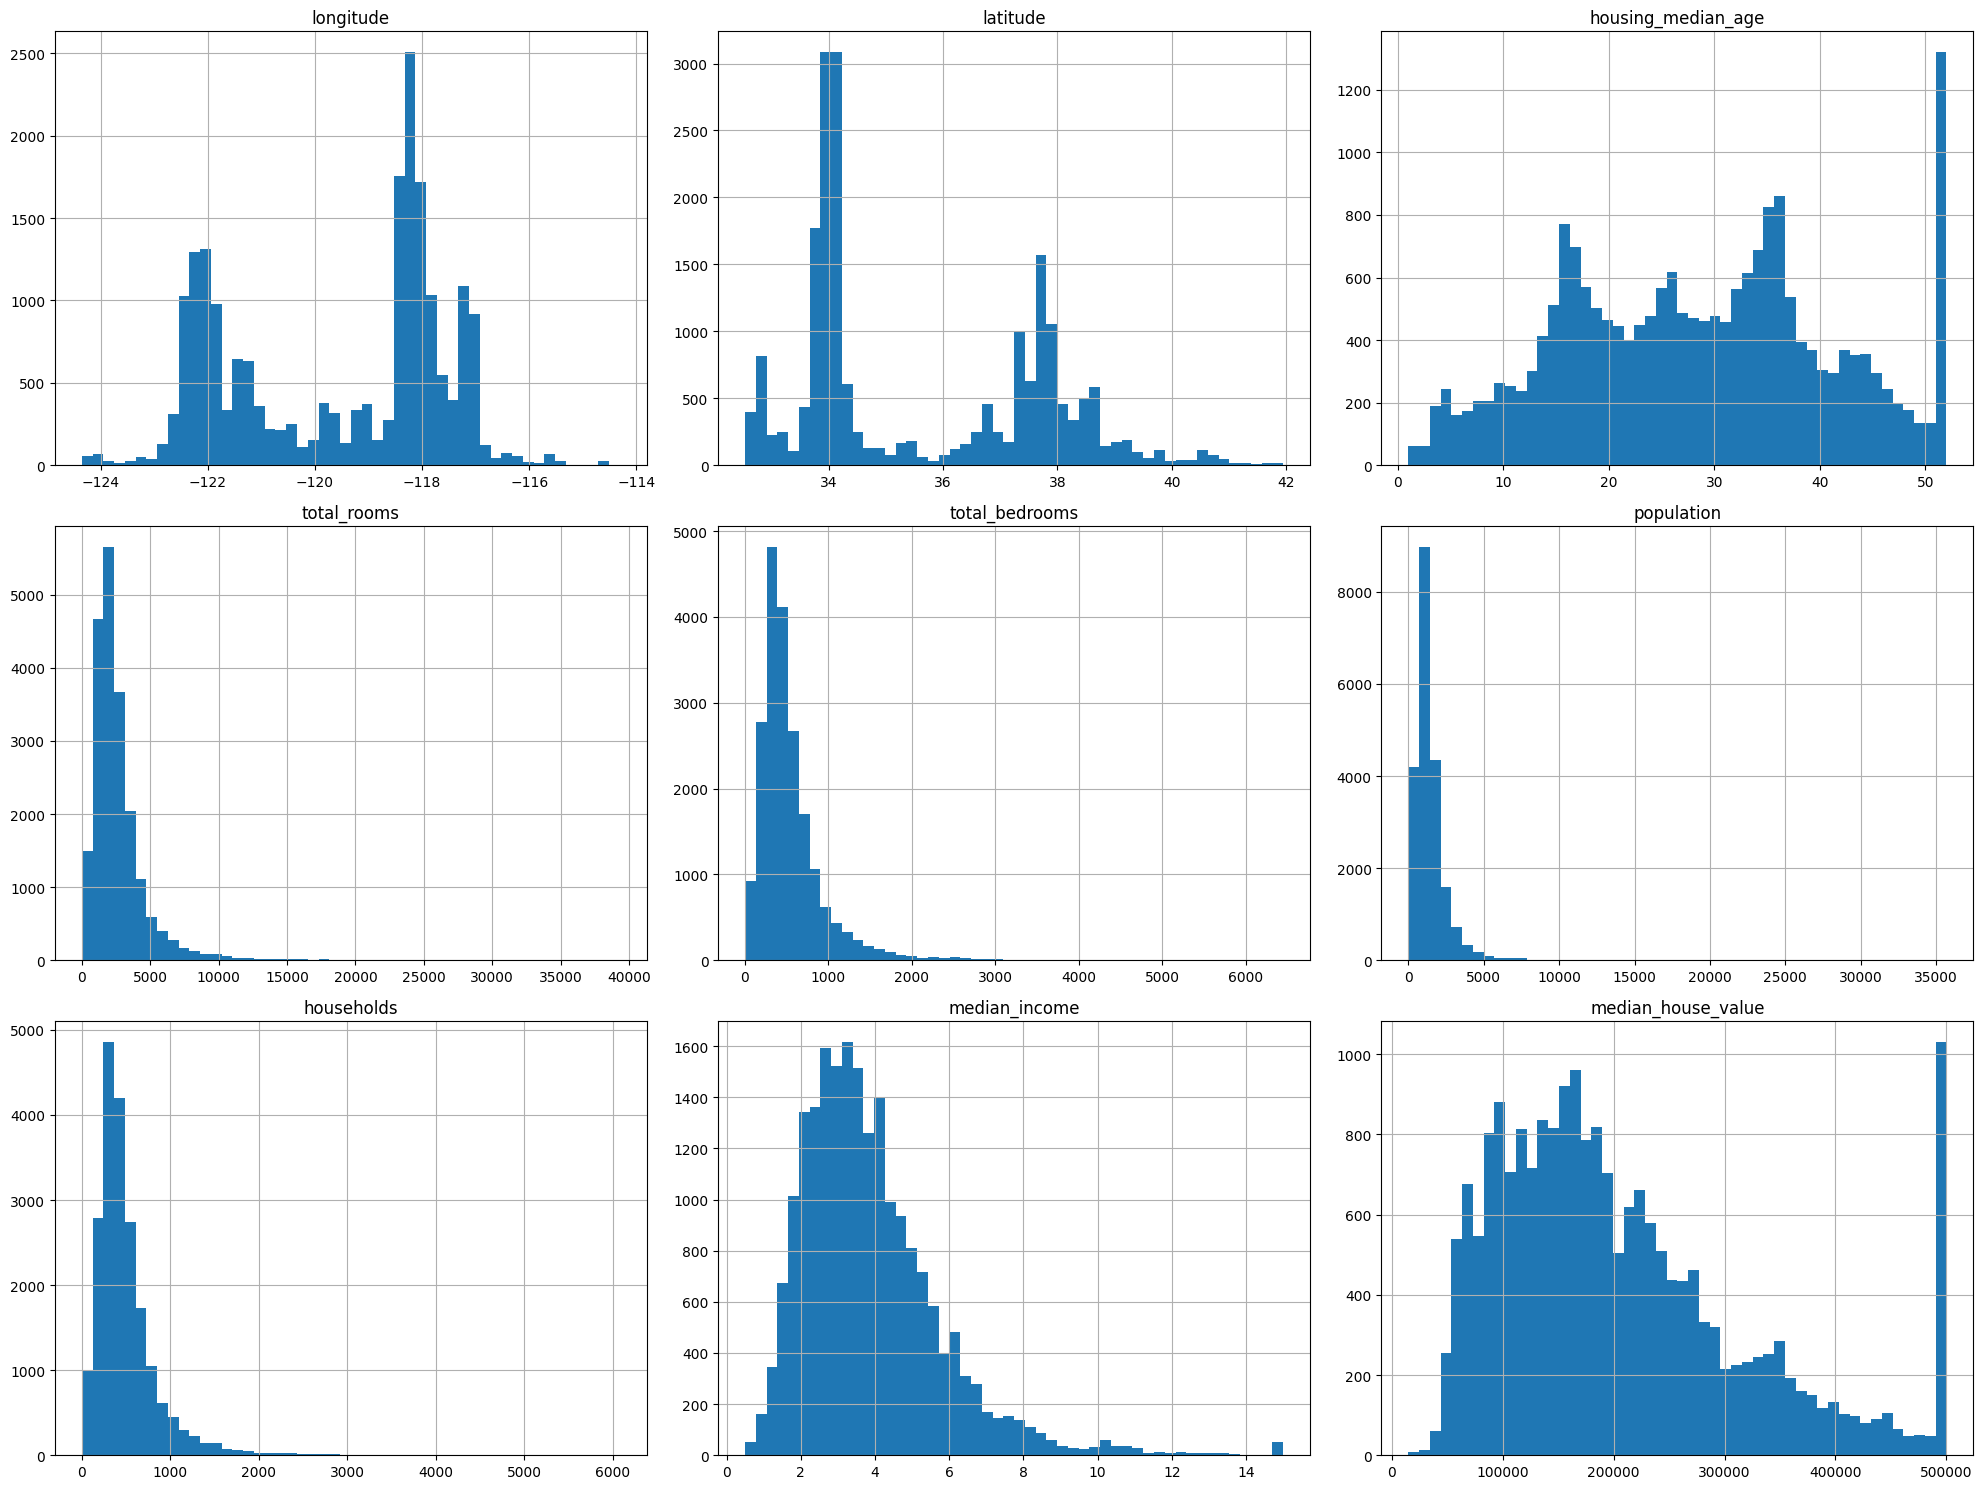

In [6]:
import matplotlib.pyplot as plt

def plot_housing_histograms(df, bins=50, figsize=(20, 15)):
    """
    Plot histograms for all numerical features in the housing dataset.
    
    Parameters
    ----------
    df : pandas.DataFrame
        The housing dataset DataFrame.
    bins : int, optional
        Number of histogram bins (default is 50).
    figsize : tuple, optional
        Figure size (default is (20, 15)).
    """
    ax = df.hist(bins=bins, figsize=figsize)
    plt.tight_layout()
    plt.show()

# Example usage
plot_housing_histograms(housing_df)


In [7]:
from zlib import crc32
import numpy as np
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing_df.reset_index()
# adds an `index` column 
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")


<Axes: >

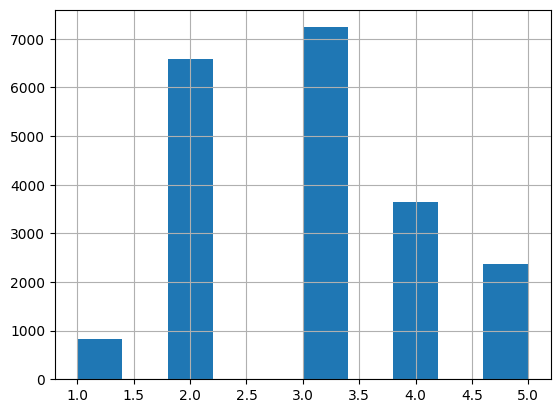

In [8]:
import pandas as pd
housing_df["income_cat"] = pd.cut(
    housing_df["median_income"], 
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
    labels=[1, 2, 3, 4, 5]
)

housing_df["income_cat"].hist()

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing_df, housing_df["income_cat"]):
    strat_train_set = housing_df.loc[train_index]
    strat_test_set = housing_df.loc[test_index]
# dropping the strat column


for set_ in (strat_train_set, strat_test_set): set_.drop("income_cat", axis=1, inplace=True)




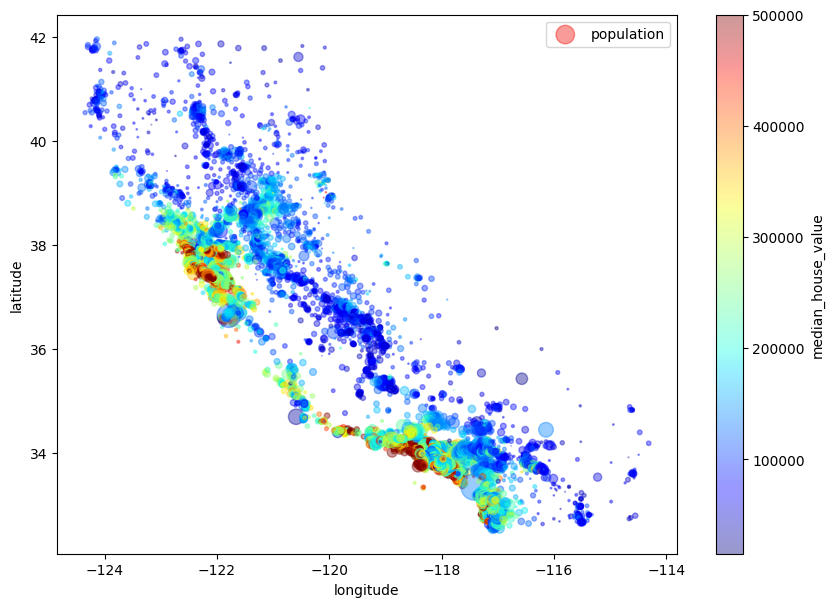

In [11]:
housing_df.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,
    s=housing_df["population"]/100,
    label="population",
    figsize=(10,7),
    c="median_house_value",
    cmap=plt.get_cmap("jet"),
    colorbar=True,
)
plt.legend()



In [ ]:
corr_matrix = housing.select_dtypes(include=[float, int]).corr()
corr_matrix["median_house_value"].sort_values()

latitude             -0.142673
longitude            -0.047466
population           -0.026882
total_bedrooms        0.047781
households            0.064590
housing_median_age    0.114146
total_rooms           0.135140
median_income         0.687151
median_house_value    1.000000
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

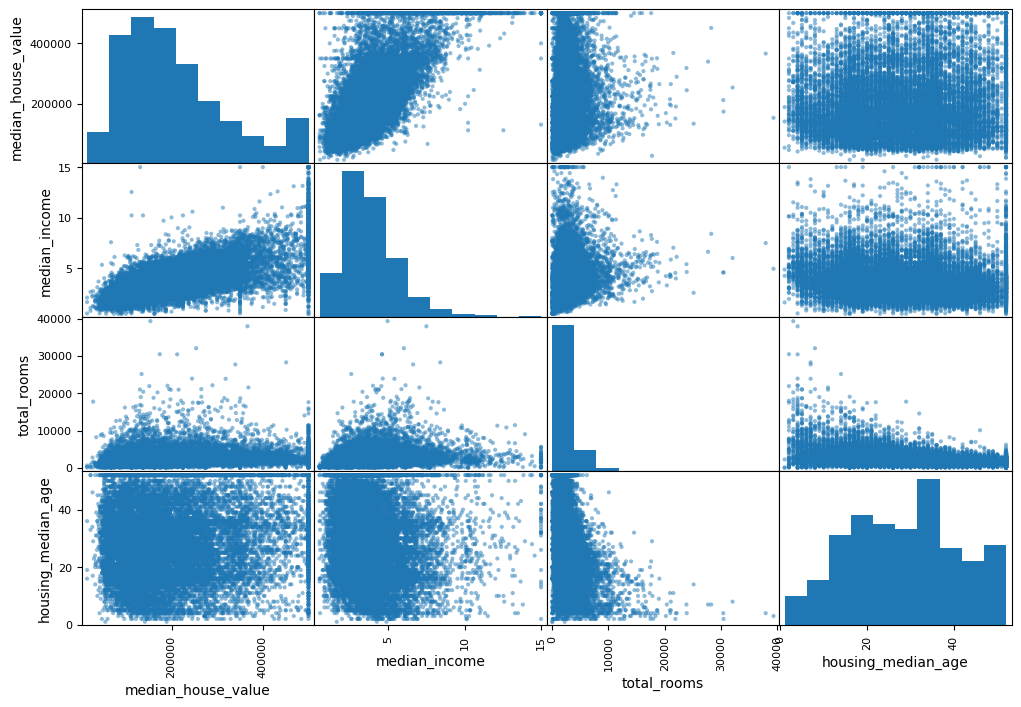

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"] 
scatter_matrix(housing[attributes], figsize=(12, 8))

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"] 
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]


# Select only numeric columns
housing_numeric = housing.select_dtypes(include=[float, int])

# Compute correlation matrix
corr_matrix = housing_numeric.corr()

# Get correlations with median_house_value, sorted
corr_with_target = corr_matrix["median_house_value"].sort_values(ascending=False)

print(corr_with_target)



median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64
